当前运行到第 0
当前运行到第 1
当前运行到第 2
当前运行到第 3
当前运行到第 4
当前运行到第 5
当前运行到第 6
当前运行到第 7
当前运行到第 8
当前运行到第 9
当前运行到第 10
当前运行到第 11
当前运行到第 12
当前运行到第 13
当前运行到第 14
当前运行到第 15
当前运行到第 16
当前运行到第 17
当前运行到第 18
当前运行到第 19
当前运行到第 20
当前运行到第 21
当前运行到第 22
当前运行到第 23
当前运行到第 24
当前运行到第 25
当前运行到第 26
当前运行到第 27
当前运行到第 28
当前运行到第 29
当前运行到第 30
当前运行到第 31
当前运行到第 32
当前运行到第 33
当前运行到第 34
当前运行到第 35
当前运行到第 36
当前运行到第 37
当前运行到第 38
当前运行到第 39
当前运行到第 40
当前运行到第 41
当前运行到第 42
当前运行到第 43
当前运行到第 44
当前运行到第 45
当前运行到第 46
当前运行到第 47
当前运行到第 48
当前运行到第 49
当前运行到第 50
当前运行到第 51
当前运行到第 52
当前运行到第 53
当前运行到第 54
当前运行到第 55
当前运行到第 56
当前运行到第 57
当前运行到第 58
当前运行到第 59
当前运行到第 60
当前运行到第 61
当前运行到第 62
当前运行到第 63
当前运行到第 64
当前运行到第 65
当前运行到第 66
当前运行到第 67
当前运行到第 68
当前运行到第 69
当前运行到第 70
当前运行到第 71
当前运行到第 72
当前运行到第 73
当前运行到第 74
当前运行到第 75
当前运行到第 76
当前运行到第 77
当前运行到第 78
当前运行到第 79
当前运行到第 80
当前运行到第 81
当前运行到第 82
当前运行到第 83
当前运行到第 84
当前运行到第 85
当前运行到第 86
当前运行到第 87
当前运行到第 88
当前运行到第 89
当前运行到第 90
当前运行到第 91
当前运行到第 92
当前运行到第 93
当前运行到第 94
当前运行到第 95
当前运行到第 96
当前运行到第 97
当前运行到第 98
当前运行到第 99


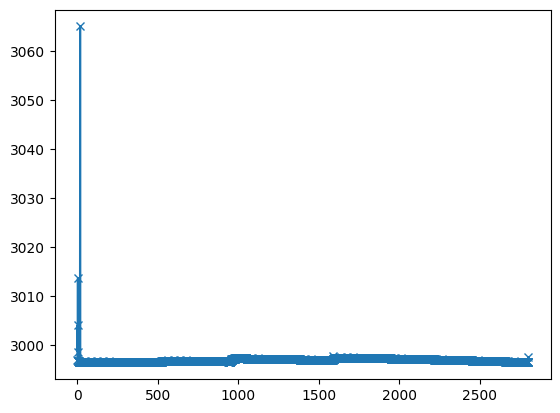

In [1]:
#该代码求解min y=0.7854*x1*(x2^2)*(3.3333*x3^2+14.9334*x3-43.0934)-1.508*x1*(x6^2+x7^2)+7.4777*(x6^3+x7^3)+0.7854*(x4*x6^2+x5*x7^2);
import torch
import torch.nn as nn
from torchsummary import summary
import pdb
import math
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from tensorboardX import SummaryWriter
from torch.utils.tensorboard import SummaryWriter
import torch.nn.init as init
# def fanfunc(x):
#     k=100#y属于(0,k)
#     result = torch.log((x /(k-x))) / 2
#     return result #这里加了绝对值防止对数取负数报错
def fanfunc1(x):
    a=3.5
    b=3.6#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc2(x):
    a=0.7
    b=0.8#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc3(x):
    a=17
    b=28#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc4(x):
    a=7.3
    b=8.3#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc5(x):
    a=7.8
    b=8.3#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc6(x):
    a=3.3
    b=3.4#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc7(x):
    a=5.25
    b=5.3#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错

class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):
        k=500000
        x1,x2,x3,x4,x5,x6,x7 = x[:, 0], x[:, 1], x[:, 2], x[:, 3], x[:, 4], x[:, 5], x[:, 6]
        x1 = fanfunc1(x1)
        x2 = fanfunc2(x2)
        x3 = fanfunc3(x3)
        x4 = fanfunc4(x4)
        x5 = fanfunc5(x5)
        x6 = fanfunc6(x6)
        x7 = fanfunc7(x7)
        y1 = 27/(x1*x3*pow(x2,2))-1#6e-4属于误差允许范围
        y2 = 397.5/(x1*pow(x3,2)*pow(x2,2))-1
        y3 = 1.93*pow(x4,3)/(x2*x3*pow(x6,4))-1
        y4 = 1.93*pow(x5,3)/(x2*x3*pow(x7,4))-1
        y5 = pow(pow(745*x4/(x2*x3),2)+16.9*1e6,0.5)/(110*pow(x6,3))-1
        y6 = pow(pow(745*x5/(x2*x3),2)+157.5*1e6,0.5)/(85*pow(x7,3))-1
        y7 = x2*x3/40-1
        y8 = 5*x2/x1-1
        y9 = x1/(12*x2)-1
        y10 = (1.5*x6+1.9)/x4-1
        y11 = (1.1*x7+1.9)/x5-1
        y12 = -x1+2.6
        y13 = x1-3.6
        y14 = -x2+0.7
        y15 = x2-0.8
        y16 = -x3+17
        y17 = x3-28
        y18 = -x4+7.3
        y19 = x4-8.3
        y20 = -x5+7.8
        y21 = x5-8.3
        y22 = -x6+2.9
        y23 = x6-39
        y24 = -x7+5
        y25 = x7-5.5
        y26 = 0.7854*x1*pow(x2,2)*(3.3333*pow(x3,2)+14.9334*x3-43.0934)-1.508*x1*(pow(x6,2)+pow(x7,2))+7.4777*(pow(x6,3)+pow(x7,3))+0.7854*(x4*pow(x6,2)+x5*pow(x7,2))
        y1 = F.relu(y1)
        y2 = F.relu(y2)
        y3 = F.relu(y3)
        y4 = F.relu(y4)
        y5 = F.relu(y5)
        y6 = F.relu(y6)
        y7 = F.relu(y7)
        y8 = F.relu(y8)
        y9 = F.relu(y9)
        y10 = F.relu(y10)
        y11 = F.relu(y11)
        y12 = F.relu(y12)
        y13 = F.relu(y13)
        y14 = F.relu(y14)
        y15 = F.relu(y15)
        y16 = F.relu(y16)
        y17 = F.relu(y17)
        y18 = F.relu(y18)
        y19 = F.relu(y19)
        y20 = F.relu(y20)
        y21 = F.relu(y21)
        y22 = F.relu(y22)
        y23 = F.relu(y23)
        y24 = F.relu(y24)
        y25 = F.relu(y25)
        y1 = k*y1
        y2 = k*y2
        y3 = k*y3
        y4 = k*y4
        y5 = k*y5
        y6 = k*10*y6
        y7 = k*y7
        y8 = k*y8
        y9 = k*y9
        y10 = k*y10
        y11 = k*y11
        y12 = k*y12
        y13 = k*y13
        y14 = k*y14
        y15 = k*y15
        y16 = k*y16
        y17 = k*y17
        y18 = k*y18
        y19 = k*y19
        y20 = k*y20
        y21 = k*y21
        y22 = k*y22
        y23 = k*y23
        y24 = k*y24
        y25 = k*y25
        return torch.stack([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24, y25, y26], dim=1)

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1, 7)
        self.fc2 = CustomLayer()
        self.fc3 = nn.Linear(26, 1)

        self.fc1.weight.requires_grad = True
        self.fc1.bias.requires_grad = False
        #self.fc2.weight.requires_grad = False
        #self.fc2.bias.requires_grad = False
        self.fc3.weight.requires_grad = False
        self.fc3.bias.requires_grad = False

        init.uniform_(self.fc1.weight, 0,1)

#         A=0.5
#         B=28
#         init.uniform_(self.fc1.weight.data[0][0], (2.6-A)/(B-A), (3.6-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[1][0], (0.7-A)/(B-A), (0.8-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[2][0], (17-A)/(B-A), (28-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[3][0], (7.3-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[4][0], (7.8-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[5][0], (2.9-A)/(B-A), (3.9-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[6][0], (5-A)/(B-A), (5.5-A)/(B-A))
        #init.normal_(self.fc1.weight, mean=0, std=0.01)
        #init.xavier_normal_(self.fc1.weight)

        #self.fc1.weight.data.fill_(0.99) #初始化权重
#         self.fc1.weight.data[0, 0] = 0.7468 # 这是 w1 的初始值
#         self.fc1.weight.data[1, 0] = 0.61 # 这是 w2 的初始值

        self.fc1.bias.data.fill_(0)
        self.fc3.weight.data.fill_(1) #初始化权重
        self.fc3.bias.data.fill_(0)

    def forward(self, x):

        b = self.fc1(x)
        #print(self.fc1.weight) 
        #print('x=',x)
        #print('x_size',x.size())
        #print('b=',b)
        c = self.fc2(b)
        #print('c=',c)
        d = self.fc3(c)
        #print('d=',d)
        #print('w1=',w1)
        #print('w2=',w2)
        return d
    
NUM=100
RESULT_MIN=np.zeros(NUM)
RESULT_W1=np.zeros(NUM)
RESULT_W2=np.zeros(NUM)
RESULT_W3=np.zeros(NUM)
RESULT_W4=np.zeros(NUM)
RESULT_W5=np.zeros(NUM)
RESULT_W6=np.zeros(NUM)
RESULT_W7=np.zeros(NUM)
for i in range(NUM):
    print('当前运行到第',i)
    net = MyNet()
    MAX = 10000
    def train(model):
        model.train()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        train_loss = 0
        x = torch.tensor([[1.0]],requires_grad=True)
        n=1
        R_w1=[]
        R_w2=[]
        R_w3=[]
        R_w4=[]
        R_w5=[]
        R_w6=[]
        R_w7=[]
        R=[]
        prev_loss = float('inf') 
        while True:
            optimizer.zero_grad()
            loss = model(x)
            loss.requires_grad_(True)
            #print('loss=',loss)
            loss.backward()

            R.append(loss.detach().numpy())
            R_w1.append(model.fc1.weight[0][0].item())
            R_w2.append(model.fc1.weight[1][0].item())
            R_w3.append(model.fc1.weight[2][0].item())
            R_w4.append(model.fc1.weight[3][0].item())
            R_w5.append(model.fc1.weight[4][0].item())
            R_w6.append(model.fc1.weight[5][0].item())
            R_w7.append(model.fc1.weight[6][0].item())
            
            optimizer.step()
            k=1
            model.fc1.weight.data.clamp_(0, k)
            train_loss += loss.item()

            n = n+1
            if loss.item() > prev_loss+1 and n>2000:
            #if n>MAX:
            #if loss.item() < 1e-6:  # 收敛条件
                break
            prev_loss = loss.item()    
            if n>10000:
                break

        return loss,np.squeeze(R),R_w1,R_w2,R_w3,R_w4,R_w5,R_w6,R_w7
    loss=[]
    R=[]
    R_w1=[]
    R_w2=[]
    R_w3=[]
    R_w4=[]
    R_w5=[]
    R_w6=[]
    R_w7=[]
    loss,R,R_w1,R_w2,R_w3,R_w4,R_w5,R_w6,R_w7=train(net)
    RESULT_MIN[i]=R[np.argmin(R)]
    RESULT_W1[i]=R_w1[np.argmin(R)]
    RESULT_W2[i]=R_w2[np.argmin(R)]
    RESULT_W3[i]=R_w3[np.argmin(R)]
    RESULT_W4[i]=R_w4[np.argmin(R)]
    RESULT_W5[i]=R_w5[np.argmin(R)]
    RESULT_W6[i]=R_w6[np.argmin(R)]
    RESULT_W7[i]=R_w7[np.argmin(R)]



loss,R,R_w1,R_w2,R_w3,R_w4,R_w5,R_w6,R_w7=train(net)
x=np.arange(len(R))
plt.plot(x,R,marker="x")
plt.show()
# 生成计算图
# x = torch.tensor([[1.0, 1.0]],requires_grad=True)
# out = net(x)
# make_dot(out, params=dict(net.named_parameters()))
writer = SummaryWriter()
writer.add_graph(net, torch.tensor([[1.0]],requires_grad=True))
writer.close()


In [2]:
www=np.argmin(RESULT_MIN)
w1=fanfunc1(RESULT_W1[www])
w2=fanfunc2(RESULT_W2[www])
w3=fanfunc3(RESULT_W3[www])
w4=fanfunc4(RESULT_W4[www])
w5=fanfunc5(RESULT_W5[www])
w6=fanfunc6(RESULT_W6[www])
w7=fanfunc7(RESULT_W7[www])
MIN=min(RESULT_MIN)
print('w1=',w1,'w2=',w2,'w3=',w3,'w4=',w4,'w5=',w5,'w6=',w6,'w7=',w7,'min=',MIN)



w1= 3.5 w2= 0.7 w3= 17.0 w4= 7.3 w5= 7.8 w6= 3.350214797258377 w7= 5.286684221029281 min= 2996.3486328125


In [3]:
x1 = w1
x2 = w2
x3 = w3
x4 = w4
x5 = w5
x6 = w6
x7 = w7
y1 = 27/(x1*x3*pow(x2,2))-1#6e-4属于误差允许范围
y2 = 397.5/(x1*pow(x3,2)*pow(x2,2))-1
y3 = 1.93*pow(x4,3)/(x2*x3*pow(x6,4))-1
y4 = 1.93*pow(x5,3)/(x2*x3*pow(x7,4))-1
y5 = pow(pow(745*x4/(x2*x3),2)+16.9*1e6,0.5)/(110*pow(x6,3))-1
y6 = pow(pow(745*x5/(x2*x3),2)+157.5*1e6,0.5)/(85*pow(x7,3))-1
y7 = x2*x3/40-1
y8 = 5*x2/x1-1
y9 = x1/(12*x2)-1
y10 = (1.5*x6+1.9)/x4-1
y11 = (1.1*x7+1.9)/x5-1
y26 = 0.7854*x1*pow(x2,2)*(3.3333*pow(x3,2)+14.9334*x3-43.0934)-1.508*x1*(pow(x6,2)+pow(x7,2))+7.4777*(pow(x6,3)+pow(x7,3))+0.7854*(x4*pow(x6,2)+x5*pow(x7,2))
print('y1-y11',[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11],'F=',y26)

y1-y11 [-0.07391528039787332, -0.1979985271419491, -0.49917232653265076, -0.9014717715128784, -1.1745090899850652e-07, -5.625101506812058e-07, -0.7025, 0.0, -0.5833333333333333, -0.051325726590744414, -0.010852225239460278] F= 2996.3488287935083


In [2]:
x1 = 3.497599239399849
x2 = 0.7
x3 = 17
x4 = 8.3
x5 = 8.3
x6 = 3.352044640303302
x7 = 5.285866852244187
y1 = 27/(x1*x3*pow(x2,2))-1#6e-4属于误差允许范围
y2 = 397.5/(x1*pow(x3,2)*pow(x2,2))-1
y3 = 1.93*pow(x4,3)/(x2*x3*pow(x6,4))-1
y4 = 1.93*pow(x5,3)/(x2*x3*pow(x7,4))-1
y5 = pow(pow(745*x4/(x2*x3),2)+16.9*1e6,0.5)/(110*pow(x6,3))-1
y6 = pow(pow(745*x5/(x2*x3),2)+157.5*1e6,0.5)/(85*pow(x7,3))-1
y7 = x2*x3/40-1
y8 = 5*x2/x1-1
y9 = x1/(12*x2)-1
y10 = (1.5*x6+1.9)/x4-1
y11 = (1.1*x7+1.9)/x5-1
y26 = 0.7854*x1*pow(x2,2)*(3.3333*pow(x3,2)+14.9334*x3-43.0934)-1.508*x1*(pow(x6,2)+pow(x7,2))+7.4777*(pow(x6,3)+pow(x7,3))+0.7854*(x4*pow(x6,2)+x5*pow(x7,2))
print('y1-y11',[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11],'F=',y26)

y1-y11 [-0.07327961360043755, -0.19744803138599998, -0.2654769140092368, -0.8812100368907186, 0.0001454610232261011, 0.0005634597375316908, -0.7025, 0.0006864024251569401, -0.5836191381666846, -0.16529313729458395, -0.07054776657004758] F= 3015.14983231039
